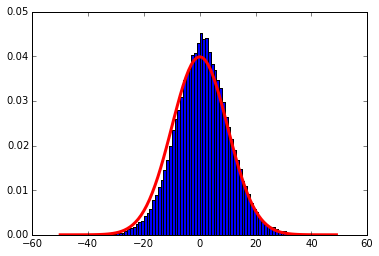

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 100000

x = np.zeros(N)
delta=2.
sigma = 10.
sigma2 = sigma**2


def metropolis(xold, delta):
    xtrial = np.random.random()
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    change=0
    if(weight >= 1): #Accept
        xnew = xtrial
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
            
    if xnew!=xold:
        change=1
    
    
    return xnew, change

xwalker = 20.
Nwarmup = 100000
totalaccepted=0.
totalaccpetedwarmup=0.
for i in range(Nwarmup):
    xwalker, change = metropolis(xwalker, delta)
    totalacceptedwarmup+=change

x[0] = xwalker
tot = x[0]
for i in range(1,N):
    x[i], change = metropolis(x[i-1], delta)
    totalaccepted+=change

binwidth=sigma/10
pyplot.hist(x,bins=np.arange(-50,50., binwidth),normed=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
pyplot.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);